In [316]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.utils import np_utils
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,  Dropout , Input, Activation, LayerNormalization


In [317]:
data= pd.read_csv(r'results.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data=data.fillna(0)

In [318]:
x = data[['Match_id', 'TotalMatch_id','Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'Referee','DiffBudgets', 'Journée','HnbPoints', 'AnbPoints', 'Hrank', 'Arank', 'FTAG Mean', 'FTHG Mean', 'HTAG Mean', 'HTHG Mean', 'AR Mean', 'HR Mean', 'AY Mean', 'HY Mean',
'AF Mean', 'HF Mean', 'AS Mean', 'HS Mean', 'AST Mean', 'HST Mean','AC Mean', 'HC Mean','A-3', 'H-3', 'A-2', 'H-2', 'A-1', 'H-1']]

y=  data['FTR']

In [319]:
le= LabelEncoder()
x['Season'] = le.fit_transform(x['Season'].astype(str))
x['DateTime'] = le.fit_transform(x['DateTime'].astype(str))
x['HomeTeam'] = le.fit_transform(x['HomeTeam'].astype(str))
x['AwayTeam'] = le.fit_transform(x['AwayTeam'].astype(str))
x['Referee'] = le.fit_transform(x['Referee'].astype(str))
y = le.fit_transform(y.astype(str))
seed = 10
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state= 8)
x_test.shape

<ipython-input-319-90c021d7f93c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Season'] = le.fit_transform(x['Season'].astype(str))
<ipython-input-319-90c021d7f93c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['DateTime'] = le.fit_transform(x['DateTime'].astype(str))
<ipython-input-319-90c021d7f93c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

(1368, 35)

In [320]:
y_train =np_utils.to_categorical(y_train, 3)
y_test = np_utils.to_categorical(y_test, 3)
y_val = np_utils.to_categorical(y_val, 3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2394, 35)
(2394, 3)
(1368, 35)
(1368, 3)


In [321]:
score_f1_list=[]

## 1er Modèle : 4 relu + softmax

In [333]:
model_1= Sequential()
model_1.add(Dense(100, input_shape=(35,), activation='relu')) # input shape is (features,)
model_1.add(Dense(30, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(3, activation='softmax'))
model_1.summary()

model_1.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_113 (Dense)           (None, 100)               3600      
                                                                 
 dense_114 (Dense)           (None, 30)                3030      
                                                                 
 dense_115 (Dense)           (None, 20)                620       
                                                                 
 dense_116 (Dense)           (None, 10)                210       
                                                                 
 dense_117 (Dense)           (None, 3)                 33        
                                                                 
Total params: 7,493
Trainable params: 7,493
Non-trainable params: 0
_________________________________________________________________


In [334]:
history_1=model_1.fit(x_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(x_val, y_val))
model_1.save((r'./model_1'))

Epoch 1/100
38/38 [==============================] - 1s 15ms/step - loss: 39.8103 - accuracy: 0.3292 - val_loss: 7.0168 - val_accuracy: 0.3847
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 11.4323 - accuracy: 0.3605 - val_loss: 5.7524 - val_accuracy: 0.4010
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 9.0311 - accuracy: 0.3697 - val_loss: 22.7197 - val_accuracy: 0.2970
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 9.0105 - accuracy: 0.3488 - val_loss: 6.4334 - val_accuracy: 0.4586
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 7.2615 - accuracy: 0.3596 - val_loss: 8.1030 - val_accuracy: 0.2820
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 6.6203 - accuracy: 0.3601 - val_loss: 4.9244 - val_accuracy: 0.2882
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 6.4555 - accuracy: 0.3596 - val_loss: 6.9124 - val_accuracy: 0.2957
Epoch 8/1

In [335]:
model_1= keras.models.load_model(r'./model_1')

In [336]:
import sklearn.metrics
from sklearn.metrics import f1_score

y_pred = model_1.predict(x_test)
r = sklearn.metrics.confusion_matrix(np.argmax(y_test, axis=1) , np.argmax(y_pred, axis=1))
r = np.flip(r)
acc = (r[0][0] + r[-1][-1]) / np.sum(r)
f1_Score = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1),  average='micro')
score_f1_list.append(f1_Score)
print('The accuracy using the confusion matrix is '+str(acc) + 'and the F1 score is '+ str(f1_Score))

43/43 [==============================] - 0s 427us/step
The accuracy using the confusion matrix is 0.4473684210526316and the F1 score is 0.4473684210526316


In [337]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print("Accuracy using evaluate method: ", score[1])

Accuracy using evaluate method:  0.44736841320991516


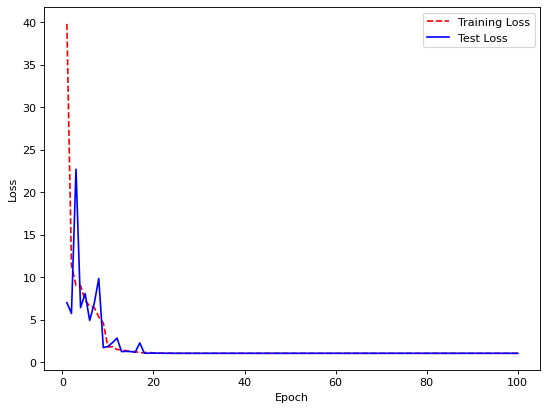

In [338]:
import matplotlib.pyplot as plt
training_loss = history_1.history['loss']
test_loss = history_1.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Deuxième modèle : 1 relu + softmax



In [361]:
model_2 = Sequential()
model_2.add(Dense(10, input_shape=(35,), activation='relu')) # input shape is (features,)
model_2.add(Dense(3, activation='softmax'))
model_2.summary()

# compile the model
model_2.compile(optimizer='adam', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])
# model.compile(optimizer='adam', 

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 10)                360       
                                                                 
 dense_125 (Dense)           (None, 3)                 33        
                                                                 
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


In [362]:
history_2=model_2.fit(x_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(x_val, y_val))
model_2.save((r'./model_2'))

Epoch 1/100
38/38 [==============================] - 0s 4ms/step - loss: 111.9939 - accuracy: 0.3956 - val_loss: 59.5010 - val_accuracy: 0.3672
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 35.7922 - accuracy: 0.3759 - val_loss: 27.0819 - val_accuracy: 0.3546
Epoch 3/100
38/38 [==============================] - 0s 993us/step - loss: 24.7593 - accuracy: 0.3739 - val_loss: 22.4357 - val_accuracy: 0.3734
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 19.9898 - accuracy: 0.3772 - val_loss: 18.2244 - val_accuracy: 0.3797
Epoch 5/100
38/38 [==============================] - 0s 989us/step - loss: 16.3636 - accuracy: 0.3947 - val_loss: 15.2031 - val_accuracy: 0.3972
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 13.7469 - accuracy: 0.4064 - val_loss: 12.4573 - val_accuracy: 0.4173
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 11.1160 - accuracy: 0.4256 - val_loss: 10.2416 - val_accuracy: 0

In [363]:
#model_2= keras.models.load_model(r'./model_2')

In [364]:
y_pred = model_2.predict(x_test)
r = sklearn.metrics.confusion_matrix(np.argmax(y_test, axis=1) , np.argmax(y_pred, axis=1))
r = np.flip(r)
acc = (r[0][0] + r[-1][-1]) / np.sum(r)
f1_Score = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1),  average='micro')
print('The accuracy using the confusion matrix is '+str(acc) + 'and the F1 score is '+ str(f1_Score))
score = model_2.evaluate(x_test, y_test, verbose=0)
print("Accuracy using evaluate method: ", score[1])

43/43 [==============================] - 0s 385us/step
The accuracy using the confusion matrix is 0.5058479532163743and the F1 score is 0.5307017543859649
Accuracy using evaluate method:  0.530701756477356


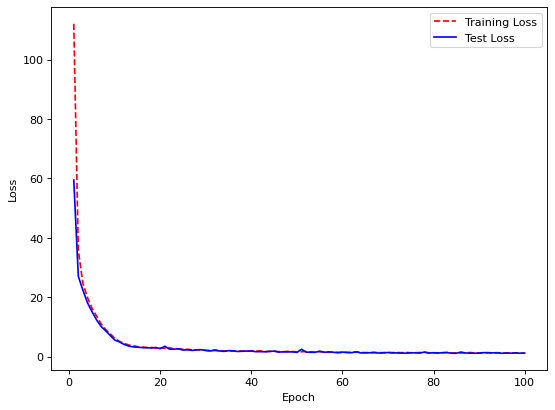

In [365]:
training_loss = history_2.history['loss']
test_loss = history_2.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

### Troisième modèle

In [230]:

model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model_3.add(LayerNormalization())
model_3.add(Dropout(.3))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dropout(.2))
model_3.add(Dense(16, activation='tanh'))
model_1.add(Dropout(.2))
model_3.add(Dense(3, activation='softmax'))

In [231]:
#model_3.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#history_3=model_3.fit(x_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(x_val, y_val))
#model_3.save((r'./model_3'))


In [232]:
model_3= keras.models.load_model(r'./model_3')

In [233]:
y_pred = model_3.predict(x_test)
r = sklearn.metrics.confusion_matrix(np.argmax(y_test, axis=1) , np.argmax(y_pred, axis=1))
r = np.flip(r)
acc = (r[0][0] + r[-1][-1]) / np.sum(r)
f1_Score = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1),  average='micro')
score_f1_list.append(f1_Score)
print('The accuracy using the confusion matrix is '+str(acc) + 'and the F1 score is '+ str(f1_Score))
score = model_3.evaluate(x_test, y_test, verbose=0)
print("Accuracy using evaluate method: ", score[1])

43/43 [==============================] - 0s 572us/step
The accuracy using the confusion matrix is 0.5716374269005848and the F1 score is 0.577485380116959
Accuracy using evaluate method:  0.5774853825569153


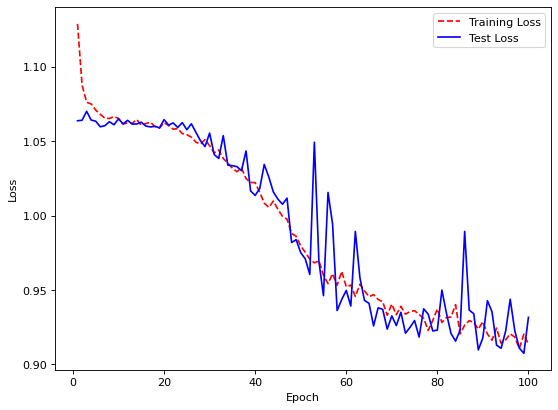

In [234]:
training_loss = history_3.history['loss']
test_loss = history_3.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

### Quatrième modèle

In [235]:
model_4 = Sequential()
model_4.add(Dense(30, activation='sigmoid', input_shape=(35,)))
model_4.add(Dropout(.4))
model_4.add(Dense(20, activation='sigmoid'))
model_4.add(Dropout(.2))
model_4.add(Dense(10, activation='sigmoid'))
model_4.add(Dropout(.2))
model_4.add(Dense(3, activation='softmax'))

# Com_3piling the model
model_4.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_4.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 30)                1080      
                                                                 
 dropout_27 (Dropout)        (None, 30)                0         
                                                                 
 dense_80 (Dense)            (None, 20)                620       
                                                                 
 dropout_28 (Dropout)        (None, 20)                0         
                                                                 
 dense_81 (Dense)            (None, 10)                210       
                                                                 
 dropout_29 (Dropout)        (None, 10)                0         
                                                                 
 dense_82 (Dense)            (None, 3)               

In [236]:
#history_4 = model_4.fit(x_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(x_val, y_val),shuffle=1)
#model_4.save((r'./model_4'))


In [237]:
model_4= keras.models.load_model(r'./model_4')

In [238]:
y_pred = model_4.predict(x_test)
r = sklearn.metrics.confusion_matrix(np.argmax(y_test, axis=1) , np.argmax(y_pred, axis=1))
r = np.flip(r)
acc = (r[0][0] + r[-1][-1]) / np.sum(r)
f1_Score = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1),  average='micro')
score_f1_list.append(f1_Score)
print('The accuracy using the confusion matrix is '+str(acc) + 'and the F1 score is '+ str(f1_Score))

43/43 [==============================] - 0s 425us/step
The accuracy using the confusion matrix is 0.4473684210526316and the F1 score is 0.4473684210526316


In [239]:
score = model_4.evaluate(x_test, y_test, verbose=0)
print("Accuracy using evaluate method: ", score[1])

Accuracy using evaluate method:  0.44736841320991516


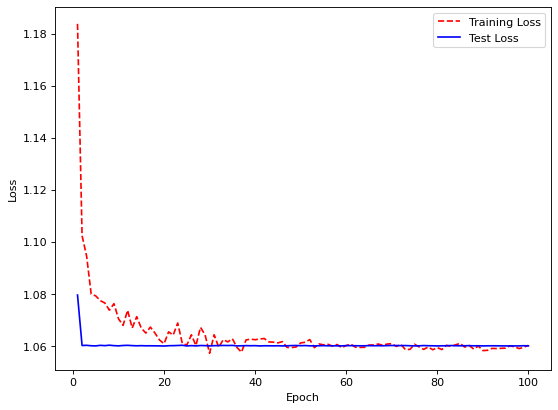

In [240]:
training_loss = history_4.history['loss']
test_loss = history_4.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [241]:
score_f1_list.append(0.33)
score_f1_list

[0.5504385964912281,
 0.4195906432748538,
 0.577485380116959,
 0.4473684210526316,
 0.33]

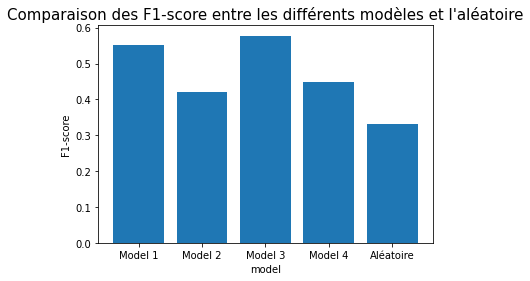

In [244]:
import matplotlib.pyplot as plt
import numpy as np

model_f1 = ('Model 1', 'Model 2', 'Model 3', 'Model 4', 'Aléatoire')
y_pos = np.arange(len(model_f1))
plt.bar(y_pos,score_f1_list)
plt.xticks(y_pos, model_f1)

plt.xlabel("model")
plt.ylabel("F1-score")
plt.title("Comparaison des F1-score entre les différents modèles et l'aléatoire",fontsize=15)

plt.show();

# Autre approche : Machine Learning et problème de regression 

##  XGBoost model

In [125]:
import xgboost as xgb
from xgboost import XGBClassifier

modelXg = XGBClassifier()
set_eval = [(x_train, y_train), (x_test, y_test)]
modelXg.fit(x_train, y_train, eval_metric=["error", "logloss"], eval_set=set_eval, verbose=False)
y_pred = modelXg.predict(x_test)
predictions = [np.round(value) for value in y_pred]

In [126]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

results = modelXg.evals_result()
epochs = len(results["validation_0"]["error"])
x_axis = range(0, epochs)

Accuracy: 44.96%


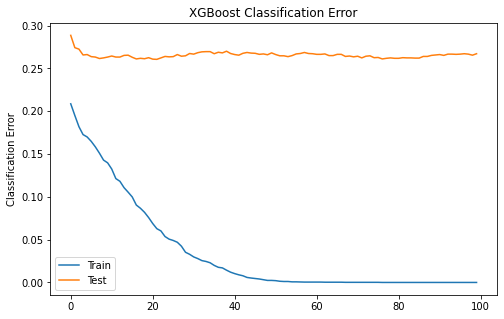

In [127]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_axis, results["validation_0"]["error"], label="Train")
ax.plot(x_axis, results["validation_1"]["error"], label="Test")
ax.legend()
plt.ylabel("Classification Error")
plt.title("XGBoost Classification Error")
plt.show()


## Linear Regression:

In [128]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [129]:
yDiffBut= data['Diff But']

In [130]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(x)

# Convert X back to a Pandas DataFrame, for convenience
x = pd.DataFrame(rescaledX, index=x.index, columns=x.columns)

In [131]:
test_size = 0.33
seed = 1
x_train, x_test, yDiffBut_train, yDiffBut_test = train_test_split(x, yDiffBut, test_size=test_size, random_state=seed)

In [132]:
models = [LinearRegression(), KNeighborsRegressor(), SVR()]

In [133]:
for regModel in models:
    regModel.fit(x_train, yDiffBut_train)
    predictions = regModel.predict(x_train)
    print(type(regModel).__name__, mean_absolute_error(yDiffBut_train, predictions))

LinearRegression 1.1518862169404702
KNeighborsRegressor 1.025139116202946
SVR 1.1026166696649984


In [134]:
for regModel in models:
    predictions = regModel.predict(x_test)
    print(type(regModel).__name__, mean_absolute_error(yDiffBut_test, predictions))

LinearRegression 1.1644352839757084
KNeighborsRegressor 1.3035215946843854
SVR 1.1547456360221828


In [135]:
bestModelReg= models[2]

In [136]:
# regPredic = bestModelReg.predict(x_test)
# regError = yDiffBut_test - predictions

In [137]:
bestModelReg.score(x_test, yDiffBut_test, sample_weight=None)

0.306294011247065